In [4]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "mlp",
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    gtm_model_args["seed"] = i
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th simulation".format(i+1))
    print("  ")
with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 10000/10000 [01:51<00:00, 89.41it/s]


Epoch   1	Iter   10	Total Training Loss:1.8316367	Rec Loss:1.5514146	MMD Loss:0.2802221	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:1.5308028	Rec Loss:1.2806113	MMD Loss:0.2501916	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:1.3008070	Rec Loss:1.0429125	MMD Loss:0.2578945	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:21.8709030	Rec Loss:12.0481606	MMD Loss:9.8227434	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Training Loss:2.1790470
Epoch   2	Iter   10	Total Training Loss:0.9346637	Rec Loss:0.8146467	MMD Loss:0.1200170	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:0.8789285	Rec Loss:0.7916427	MMD Loss:0.0872859	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:0.7784445	Rec Loss:0.7388737	MMD Loss:0.0395708	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [01:50<00:00, 90.84it/s]


Epoch   1	Iter   10	Total Training Loss:1.7342169	Rec Loss:1.4461243	MMD Loss:0.2880926	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:1.4423128	Rec Loss:1.2616270	MMD Loss:0.1806859	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:1.1091356	Rec Loss:0.9893420	MMD Loss:0.1197937	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:10.6979733	Rec Loss:11.1570978	MMD Loss:-0.4591242	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Training Loss:1.7706906
Epoch   2	Iter   10	Total Training Loss:0.8368976	Rec Loss:0.7163686	MMD Loss:0.1205290	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:0.7381365	Rec Loss:0.6883390	MMD Loss:0.0497975	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:0.7564382	Rec Loss:0.6971722	MMD Loss:0.0592660	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss

100%|██████████| 10000/10000 [01:50<00:00, 90.65it/s]


Epoch   1	Iter   10	Total Training Loss:2.4419725	Rec Loss:1.3725235	MMD Loss:1.0694489	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:1.4962503	Rec Loss:1.0748641	MMD Loss:0.4213861	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:1.0878738	Rec Loss:0.8102165	MMD Loss:0.2776572	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:10.4701538	Rec Loss:10.1185064	MMD Loss:0.3516473	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Training Loss:2.0159000
Epoch   2	Iter   10	Total Training Loss:0.6544800	Rec Loss:0.4122029	MMD Loss:0.2422771	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:0.4970276	Rec Loss:0.3920270	MMD Loss:0.1050006	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:0.4920512	Rec Loss:0.3823070	MMD Loss:0.1097442	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [01:50<00:00, 90.56it/s]


Epoch   1	Iter   10	Total Training Loss:1.9285332	Rec Loss:1.5130935	MMD Loss:0.4154397	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:1.4674491	Rec Loss:1.2557325	MMD Loss:0.2117165	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:1.1775305	Rec Loss:0.9841576	MMD Loss:0.1933729	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:17.8359070	Rec Loss:13.0981836	MMD Loss:4.7377243	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Training Loss:2.0934928
Epoch   2	Iter   10	Total Training Loss:0.7447445	Rec Loss:0.6410863	MMD Loss:0.1036582	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:0.7179574	Rec Loss:0.6053565	MMD Loss:0.1126009	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:0.7023865	Rec Loss:0.6083511	MMD Loss:0.0940355	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:

100%|██████████| 10000/10000 [01:50<00:00, 90.81it/s]


Epoch   1	Iter   10	Total Training Loss:2.6212034	Rec Loss:1.3142308	MMD Loss:1.3069727	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   20	Total Training Loss:1.4337287	Rec Loss:1.0893242	MMD Loss:0.3444045	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   30	Total Training Loss:1.0208403	Rec Loss:0.7997407	MMD Loss:0.2210996	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Iter   40	Total Training Loss:10.0160418	Rec Loss:8.7618895	MMD Loss:1.2541527	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   1	Training Loss:2.1425326
Epoch   2	Iter   10	Total Training Loss:0.3815140	Rec Loss:0.3639554	MMD Loss:0.0175586	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   20	Total Training Loss:0.3463344	Rec Loss:0.3163666	MMD Loss:0.0299679	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   30	Total Training Loss:0.3244906	Rec Loss:0.3008119	MMD Loss:0.0236786	Sparsity Loss:0.0000000	Pred Loss:0.0000000
Epoch   2	Iter   40	Total Training Loss:2

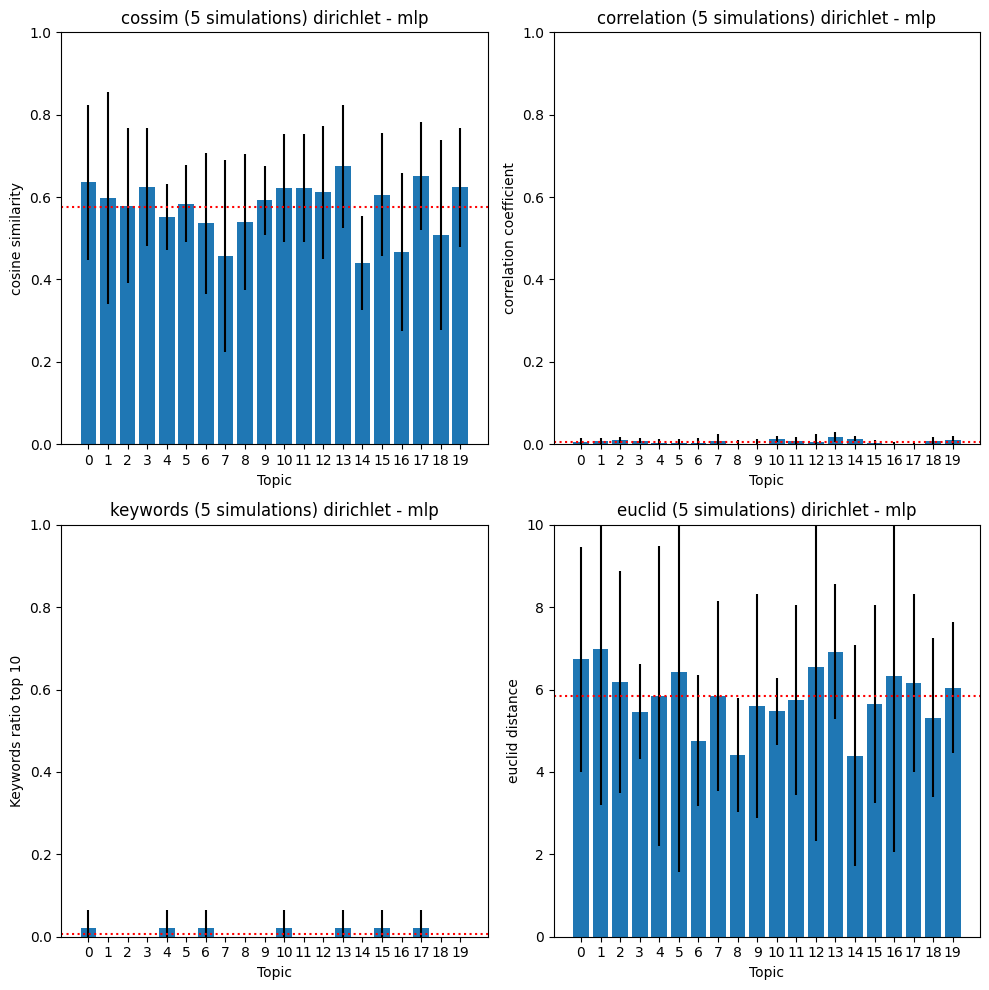

In [5]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    std = df_score_res.std()
    ax_list[i].bar(x, mean, yerr=std)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()